In [1]:
import sys

if "google.colab" in sys.modules:
    !git clone https://github.com/rapidsai/rapidsai-csp-utils.git
    !python rapidsai-csp-utils/colab/pip-install.py

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 603, done.
remote: Counting objects: 100% (169/169), done.
remote: Compressing objects: 100% (87/87), done.
remote: Total 603 (delta 131), reused 82 (delta 82), pack-reused 434 (from 3)
Receiving objects: 100% (603/603), 199.38 KiB | 9.49 MiB/s, done.
Resolving deltas: 100% (305/305), done.
Installing RAPIDS remaining 25.08 libraries
Using Python 3.12.12 environment at: /usr
Resolved 179 packages in 1.72s
Prepared 41 packages in 52.82s
Uninstalled 31 packages in 1.01s
Installed 41 packages in 490ms
 - bokeh==3.7.3
 + bokeh==3.6.3
 + cucim-cu12==25.8.0
 + cuda-bindings==12.9.4
 + cuda-pathfinder==1.3.1
 - cuda-python==12.6.2.post1
 + cuda-python==12.9.4
 - cudf-cu12==25.6.0 (from https://pypi.nvidia.com/cudf-cu12/cudf_cu12-25.6.0-cp312-cp312-manylinux_2_24_x86_64.manylinux_2_28_x86_64.whl)
 + cudf-cu12==25.8.0
 + cugraph-cu12==25.8.0
 - cuml-cu12==25.6.0
 + cuml-cu12==25.8.0
 - cuvs-cu12==25.6.1
 + cuvs-cu12==25.8.0
 + cu

# scikit-learn DBSCAN

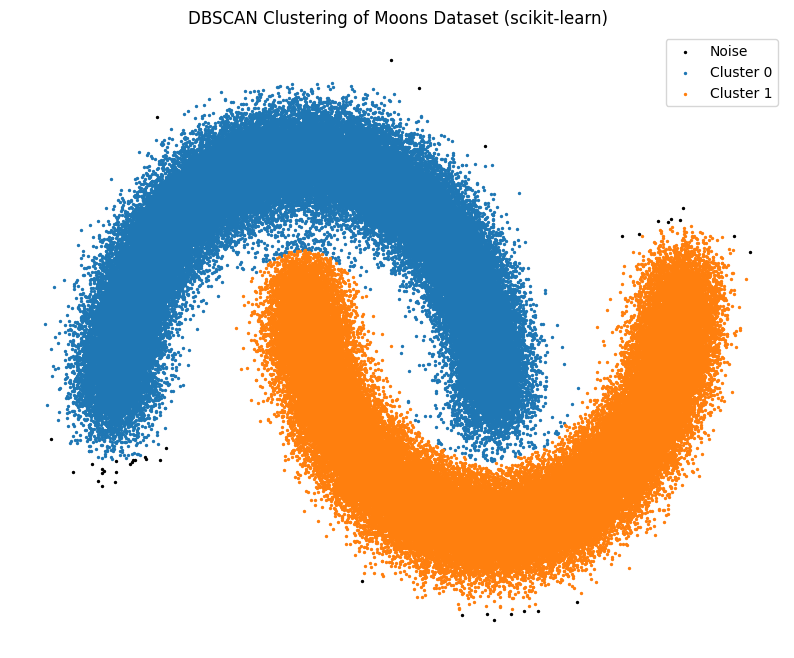

CPU times: user 15.1 s, sys: 4.52 s, total: 19.6 s
Wall time: 20.7 s


In [2]:
%%time

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


# scikit-learn make_moons 데이터 생성
X, y = make_moons(n_samples=150000, noise=0.1, random_state=0)

# scikit-learn DBSCAN 모델 초기화
dbscan = DBSCAN(eps=0.25, min_samples=1000)

# Numpy 배열 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# X_scaled에 DBSCAN을 적용하고 클러스터 레이블을 반환
clusters = dbscan.fit_predict(X_scaled)

# 시각화: 클러스터를 색상으로 구분, 노이즈는 -1로 구분
plt.figure(figsize=(10, 8))
unique_labels = np.unique(clusters)
for label in unique_labels:
    if label == -1:
        # 노이즈 포인트 (클러스터에 속하지 않은 포인트는 검은색으로 표시)
        plt.scatter(X_scaled[clusters == label, 0], X_scaled[clusters == label, 1], color='k', s=2, label='Noise')
    else:
        plt.scatter(X_scaled[clusters == label, 0], X_scaled[clusters == label, 1], s=2, label=f'Cluster {label}')

plt.axis('off')  # 축과 박스 제거
plt.title('DBSCAN Clustering of Moons Dataset (scikit-learn)')
plt.legend() # 범주 표시
plt.show()


# cuML DBSCAN

[2025-10-26 13:28:24.653] [CUML] [info] Batch size limited by the chosen integer type (4 bytes). 16878 -> 14316. Using the larger integer type might result in better performance


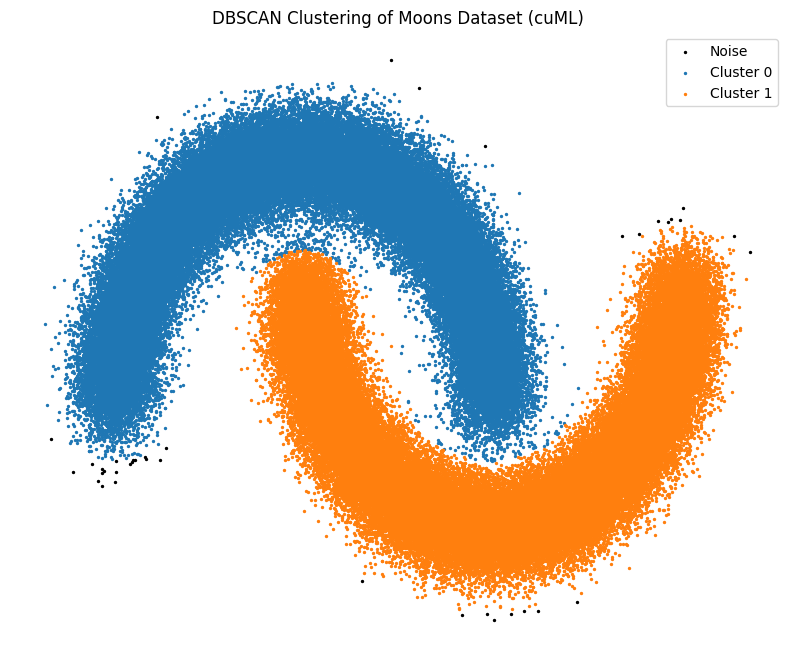

CPU times: user 11.4 s, sys: 2.38 s, total: 13.7 s
Wall time: 14.3 s


In [4]:
%%time

import numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

import cudf
import cuml
from cuml.cluster import DBSCAN
from cuml.preprocessing import StandardScaler


# scikit-learn make_moons 데이터 생성
X, y = make_moons(n_samples=150000, noise=0.1, random_state=0)

# Numpy 배열 스케일링 (데이터가 GPU 메모리로 이동)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# cuML DBSCAN 모델 초기화
dbscan = DBSCAN(eps=0.25, min_samples=1000)

# X_scaled에 DBSCAN을 적용하고 클러스터 레이블을 반환
clusters = dbscan.fit_predict(X_scaled)

# 시각화: 클러스터를 색상으로 구분, 노이즈는 -1로 구분
plt.figure(figsize=(10, 8))
unique_labels = np.unique(clusters)
for label in unique_labels:
    if label == -1:
        # 노이즈 포인트 (클러스터에 속하지 않은 포인트는 검은색으로 표시)
        plt.scatter(X_scaled[clusters == label, 0], X_scaled[clusters == label, 1], color='k', s=2, label='Noise')
    else:
        plt.scatter(X_scaled[clusters == label, 0], X_scaled[clusters == label, 1], s=2, label=f'Cluster {label}')

plt.axis('off')  # 축과 박스 제거
plt.title('DBSCAN Clustering of Moons Dataset (cuML)')
plt.legend() # 범주 표시
plt.show()
